In [1]:
# Dependencies and Setup
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import datetime,date

# File to Load
LNSDF=pd.read_pickle('resources/LNS2020.pkl',compression='gzip')
# Preview of the DataFrame
LNSDF.head()

,series_id,year,value,Month,lfst_code,periodicity_code,series_title,activity_code,ages_code,class_code,duration_code,education_code,entr_code,expr_code,indy_text
0,LNS11000000,2015,157030.0,1,10,M,(Seas) Civilian Labor Force Level,0,00,0,0,00,0,0,All Industries
1,LNS11000000,2015,156644.0,2,10,M,(Seas) Civilian Labor Force Level,0,00,0,0,00,0,0,All Industries
2,LNS11000000,2015,156643.0,3,10,M,(Seas) Civilian Labor Force Level,0,00,0,0,00,0,0,All Industries
3,LNS11000000,2015,157060.0,4,10,M,(Seas) Civilian Labor Force Level,0,00,0,0,00,0,0,All Industries
4,LNS11000000,2015,157651.0,5,10,M,(Seas) Civilian Labor Force Level,0,00,0,0,00,0,0,All Industries


In [2]:
# Check for correct data types - need to convert
LNSDF.dtypes

series_id            object
year                  int64
value               float64
Month                 int32
lfst_code             int64
periodicity_code     object
series_title         object
activity_code         int64
ages_code            object
class_code            int64
duration_code         int64
education_code       object
entr_code             int64
expr_code             int64
indy_text            object
dtype: object

In [3]:
# Check column names for spaces - looks good
LNSDF.columns

Index(['series_id', 'year', 'value', 'Month', 'lfst_code', 'periodicity_code',
       'series_title', 'activity_code', 'ages_code', 'class_code',
       'duration_code', 'education_code', 'entr_code', 'expr_code',
       'indy_text'],
      dtype='object')

In [4]:
# Identify incomplete rows
LNSDF.count()

series_id           1280
year                1280
value               1280
Month               1280
lfst_code           1280
periodicity_code    1280
series_title        1280
activity_code       1280
ages_code           1280
class_code          1280
duration_code       1280
education_code      1280
entr_code           1280
expr_code           1280
indy_text           1280
dtype: int64

In [5]:
# Drop all rows with missing information
# df = unemployment_df.dropna(how='any')

In [6]:
# Verify dropped rows
LNSDF.count()

series_id           1280
year                1280
value               1280
Month               1280
lfst_code           1280
periodicity_code    1280
series_title        1280
activity_code       1280
ages_code           1280
class_code          1280
duration_code       1280
education_code      1280
entr_code           1280
expr_code           1280
indy_text           1280
dtype: int64

In [7]:
# Check states values
LNSDF['series_id'].value_counts()

LNS13000003    64
LNS13000006    64
LNS13000089    64
LNS13000000    64
LNS13000002    64
LNS11000002    64
LNS13024230    64
LNS13027659    64
LNS11000000    64
LNS13000091    64
LNS13000009    64
LNS13000036    64
LNS11300093    64
LNS13000012    64
LNS13000001    64
LNS13027689    64
LNS13027660    64
LNS13032183    64
LNS11000001    64
LNS13027662    64
Name: series_id, dtype: int64

In [8]:
# Display a statistical overview for a high level insight into the data
LNSDF.describe()

,year,value,Month,lfst_code,activity_code,class_code,duration_code,entr_code,expr_code
count,1280.000000,1280.000000,1280.000000,1280.000000,1280.0,1280.0,1280.0,1280.0,1280.0
mean,2017.187500,17775.726250,6.250000,26.150000,0.0,0.0,0.0,0.0,0.0
std,1.550555,40352.856153,3.492425,7.724903,0.0,0.0,0.0,0.0,0.0
min,2015.000000,79.100000,1.000000,10.000000,0.0,0.0,0.0,0.0,0.0
25%,2016.000000,1068.750000,3.000000,30.000000,0.0,0.0,0.0,0.0,0.0
50%,2017.000000,1462.000000,6.000000,30.000000,0.0,0.0,0.0,0.0,0.0
75%,2018.250000,4288.250000,9.000000,30.000000,0.0,0.0,0.0,0.0,0.0
max,2020.000000,164606.000000,12.000000,30.000000,0.0,0.0,0.0,0.0,0.0


In [9]:
print(LNSDF)

         series_id  year     value  Month  lfst_code periodicity_code  \
0      LNS11000000  2015  157030.0      1         10                M   
1      LNS11000000  2015  156644.0      2         10                M   
2      LNS11000000  2015  156643.0      3         10                M   
3      LNS11000000  2015  157060.0      4         10                M   
4      LNS11000000  2015  157651.0      5         10                M   
...            ...   ...       ...    ...        ...              ...   
28923  LNS13032183  2019     264.0     12         30                M   
28924  LNS13032183  2020     315.0      1         30                M   
28925  LNS13032183  2020     262.0      2         30                M   
28926  LNS13032183  2020     433.0      3         30                M   
28927  LNS13032183  2020    1438.0      4         30                M   

                            series_title  activity_code ages_code  class_code  \
0      (Seas) Civilian Labor Force Level  

In [10]:
series = LNSDF['series_id'].unique()
print(series)

['LNS11000000' 'LNS11000001' 'LNS11000002' 'LNS11300093' 'LNS13000000'
 'LNS13000001' 'LNS13000002' 'LNS13000003' 'LNS13000006' 'LNS13000009'
 'LNS13000012' 'LNS13000036' 'LNS13000089' 'LNS13000091' 'LNS13024230'
 'LNS13027659' 'LNS13027660' 'LNS13027662' 'LNS13027689' 'LNS13032183']


In [11]:
condition = LNSDF['series_id'].isin(series)
LNSSeriesDF = LNSDF[condition]
LNSSeriesDF.head()

,series_id,year,value,Month,lfst_code,periodicity_code,series_title,activity_code,ages_code,class_code,duration_code,education_code,entr_code,expr_code,indy_text
0,LNS11000000,2015,157030.0,1,10,M,(Seas) Civilian Labor Force Level,0,00,0,0,00,0,0,All Industries
1,LNS11000000,2015,156644.0,2,10,M,(Seas) Civilian Labor Force Level,0,00,0,0,00,0,0,All Industries
2,LNS11000000,2015,156643.0,3,10,M,(Seas) Civilian Labor Force Level,0,00,0,0,00,0,0,All Industries
3,LNS11000000,2015,157060.0,4,10,M,(Seas) Civilian Labor Force Level,0,00,0,0,00,0,0,All Industries
4,LNS11000000,2015,157651.0,5,10,M,(Seas) Civilian Labor Force Level,0,00,0,0,00,0,0,All Industries


In [12]:
unemp_df = LNSSeriesDF[['year','Month','value','series_title']]

unemp_df['date']=unemp_df['year'].astype(str) + "-"+ unemp_df['Month'].astype(str) 
unemp_df.head()

/Users/harinirao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,year,Month,value,series_title,date
0,2015,1,157030.0,(Seas) Civilian Labor Force Level,2015-1
1,2015,2,156644.0,(Seas) Civilian Labor Force Level,2015-2
2,2015,3,156643.0,(Seas) Civilian Labor Force Level,2015-3
3,2015,4,157060.0,(Seas) Civilian Labor Force Level,2015-4
4,2015,5,157651.0,(Seas) Civilian Labor Force Level,2015-5


In [13]:
unemp_df = pd.pivot_table(unemp_df,index=['date'],values=['value'],columns=['series_title'])
unemp_df.reset_index(inplace=True)
unemp_df.head()

date                             value  \
series_title          (Seas) Civilian Labor Force Level   
0              2015-1                          157030.0   
1             2015-10                          157167.0   
2             2015-11                          157463.0   
3             2015-12                          158035.0   
4              2015-2                          156644.0   

                                                      \
series_title (Seas) Civilian Labor Force Level - Men   
0                                            83597.0   
1                                            83588.0   
2                                            83574.0   
3                                            83994.0   
4                                            83453.0   

                                                        \
series_title (Seas) Civilian Labor Force Level - Women   
0                                              73432.0   
1                                              73579.0   
2                                              73889.0   
3                                              74041.0   
4                                              73191.0   

                                                                 \
series_title (Seas) Labor Force Participation Rate - 45-54 yrs.   
0                                                          79.7   
1                                                          79.4   
2                                                          79.6   
3                                                          79.6   
4                                                          79.7   

                                                                               \
series_title (Seas) Unemployment Level (Seas) Unemployment Level - 16-19 yrs.   
0                               8885.0                                 1073.0   
1                               7922.0                                  894.0   
2                               8000.0                                  862.0   
3                               7907.0                                  950.0   
4                               8599.0                                  967.0   

                                                     \
series_title (Seas) Unemployment Level - 20-24 yrs.   
0                                            1486.0   
1                                            1424.0   
2                                            1507.0   
3                                            1425.0   
4                                            1557.0   

                                                     \
series_title (Seas) Unemployment Level - 25-34 yrs.   
0                                            2024.0   
1                                            1825.0   
2                                            1914.0   
3                                            1851.0   
4                                            1864.0   

                                                     ...  \
series_title (Seas) Unemployment Level - 35-44 yrs.  ...   
0                                            1425.0  ...   
1                                            1346.0  ...   
2                                            1299.0  ...   
3                                            1310.0  ...   
4                                            1431.0  ...   

                                                \
series_title (Seas) Unemployment Level - Asian   
0                                        356.0   
1                                        314.0   
2                                        359.0   
3                                        379.0   
4                                        359.0   

                                                                                       \
series_title (Seas) Unemployment Level - Bachelor's degree and higher, 25 yrs. & over   
0                                          

In [14]:
# Rename columns
new_df=unemp_df.rename(
    columns = {
        '(Seas) Civilian Labor Force Level':'labor_force',
        '(Seas) Civilian Labor Force Level - Men':'labor_force_men',
        '(Seas) Civilian Labor Force Level - Women': 'labor_force_women',
        '(Seas) Labor Force Participation Rate - 45-54 yrs.': 'age_range_45-54',
        '(Seas) Unemployment Level':'unemployment_level',
        '(Seas) Unemployment Level - 16-19 yrs.': 'age_range_16-19',
        '(Seas) Unemployment Level - 20-24 yrs.': 'age_range_20-24',
        '(Seas) Unemployment Level - 25-34 yrs.':'age_range_25-34',
        '(Seas) Unemployment Level - 35-44 yrs.':'age_range_35-44',
        '(Seas) Unemployment Level - 55 yrs. & over':'age_range_55_and_over',
        '(Seas) Unemployment Level - Asian':'ethnicity_asian',
        "(Seas) Unemployment Level - Bachelor's degree and higher, 25 yrs. & over":"education_bachelors_degree_and_higher",
        '(Seas) Unemployment Level - Black or African American':'ethnicity_african_american',
        '(Seas) Unemployment Level - High School Graduates, No College, 25 yrs. & over':'education_highschool_no_college',
        '(Seas) Unemployment Level - Hispanic or Latino':'ethnicity_hispanic',
        '(Seas) Unemployment Level - Less than a High School Diploma, 25 yrs. & over':'education_less_than_highschool',
        '(Seas) Unemployment Level - Men':'gender_men',
        '(Seas) Unemployment Level - Some College or Associate Degree, 25 yrs. & over':'education_some_college_or_associate_degree',
        '(Seas) Unemployment Level - White':'ethnicity_white',
        '(Seas) Unemployment Level - Women':'gender_women',
    }) 

In [15]:
new_df.head()

date       value                                    \
series_title          labor_force labor_force_men labor_force_women   
0              2015-1    157030.0         83597.0           73432.0   
1             2015-10    157167.0         83588.0           73579.0   
2             2015-11    157463.0         83574.0           73889.0   
3             2015-12    158035.0         83994.0           74041.0   
4              2015-2    156644.0         83453.0           73191.0   

                                                                 \
series_title age_range_45-54 unemployment_level age_range_16-19   
0                       79.7             8885.0          1073.0   
1                       79.4             7922.0           894.0   
2                       79.6             8000.0           862.0   
3                       79.6             7907.0           950.0   
4                       79.7             8599.0           967.0   

                                                              ...  \
series_title age_range_20-24 age_range_25-34 age_range_35-44  ...   
0                     1486.0          2024.0          1425.0  ...   
1                     1424.0          1825.0          1346.0  ...   
2                     1507.0          1914.0          1299.0  ...   
3                     1425.0          1851.0          1310.0  ...   
4                     1557.0          1864.0          1431.0  ...   

                                                                    \
series_title ethnicity_asian education_bachelors_degree_and_higher   
0                      356.0                                1458.0   
1                      314.0                                1339.0   
2                      359.0                                1342.0   
3                      379.0                                1319.0   
4                      359.0                                1408.0   

                                                                         \
series_title ethnicity_african_american education_highschool_no_college   
0                                1951.0                          1910.0   
1                                1741.0                          1841.0   
2                                1830.0                          1920.0   
3                                1656.0                          1942.0   
4                                1923.0                          1891.0   

                                                                           \
series_title ethnicity_hispanic education_less_than_highschool gender_men   
0                        1745.0                          939.0     4863.0   
1                        1661.0                          811.0     4242.0   
2                        1674.0                          742.0     4339.0   
3                        1628.0                          695.0     4280.0   
4                        1758.0                          919.0     4691.0   

                                                                         \
series_title education_some_college_or_associate_degree ethnicity_white   
0                                                1945.0          6023.0   
1                                                1642.0          5417.0   
2                                                1654.0          5456.0   
3                                                1566.0          5462.0   
4                                                1858.0          5853.0   

                           
series_title gender_women  
0                  4022.0  
1                  3680.0  
2                  3661.0  
3                  3628.0  
4                  3908.0  

[5 rows x 21 columns]

In [16]:
# Export clean data to CSV for analysis

output_file = "Resources/Demographics_Data.csv"
new_df.to_csv(output_file)

In [17]:
# get Unemployment level
# LNS13000000 all
# LNS13000001 Men
# LNS13000002  Women
condition = LNSDF['series_id'].isin(['LNS13000000','LNS13000001','LNS13000002'])
allUnemploymentDF = LNSDF[condition]
allUnemploymentDF.head()

,series_id,year,value,Month,lfst_code,periodicity_code,series_title,activity_code,ages_code,class_code,duration_code,education_code,entr_code,expr_code,indy_text
22656,LNS13000000,2015,8885.0,1,30,M,(Seas) Unemployment Level,0,00,0,0,00,0,0,All Industries
22657,LNS13000000,2015,8599.0,2,30,M,(Seas) Unemployment Level,0,00,0,0,00,0,0,All Industries
22658,LNS13000000,2015,8515.0,3,30,M,(Seas) Unemployment Level,0,00,0,0,00,0,0,All Industries
22659,LNS13000000,2015,8550.0,4,30,M,(Seas) Unemployment Level,0,00,0,0,00,0,0,All Industries
22660,LNS13000000,2015,8834.0,5,30,M,(Seas) Unemployment Level,0,00,0,0,00,0,0,All Industries


In [18]:
df = allUnemploymentDF[['series_id','year','Month','value']]
df['date']=df['year'].astype(str) + "-"+ df['Month'].astype(str) 
df.head()

/Users/harinirao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,series_id,year,Month,value,date
22656,LNS13000000,2015,1,8885.0,2015-1
22657,LNS13000000,2015,2,8599.0,2015-2
22658,LNS13000000,2015,3,8515.0,2015-3
22659,LNS13000000,2015,4,8550.0,2015-4
22660,LNS13000000,2015,5,8834.0,2015-5


In [19]:
df = pd.pivot_table(df,index=['date'],values=['value'],columns=['series_id'])

df.head()

value                        
series_id LNS13000000 LNS13000001 LNS13000002
date                                         
2015-1         8885.0      4863.0      4022.0
2015-10        7922.0      4242.0      3680.0
2015-11        8000.0      4339.0      3661.0
2015-12        7907.0      4280.0      3628.0
2015-2         8599.0      4691.0      3908.0

In [20]:
df.reset_index(inplace=True)
df.columns

MultiIndex([( 'date',            ''),
            ('value', 'LNS13000000'),
            ('value', 'LNS13000001'),
            ('value', 'LNS13000002')],
           names=[None, 'series_id'])

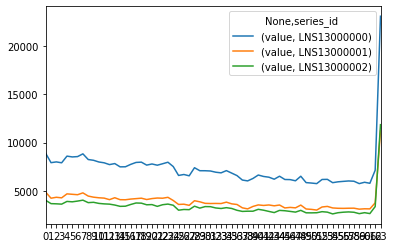

In [21]:
ax = df.plot(xticks=df.index)

